In [3]:
#USING ONLY TWO FEATURES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
import seaborn as sns

In [5]:
data=pd.read_csv("iris.csv")
x=data.iloc[:,0:3].values
y=data.iloc[:,-1].values

In [6]:
data=data[["SepalLengthCm","SepalWidthCm","Species"]]

In [7]:
def split(df):
    test_data=pd.DataFrame()
    d1=df[df['Species']=="Iris-setosa"][0:3]
    d2=df[df['Species']=="Iris-versicolor"][0:3]
    d3=df[df['Species']=="Iris-virginica"][0:3]
    test_data=pd.concat([d1,d2,d3])
    training_data=df.loc[list(set(df.index)-set(test_data.index))]
    return [test_data,training_data]
    
   
    


In [8]:
test_data,training_data=split(data)
print(test_data)
print(training_data)

     SepalLengthCm  SepalWidthCm          Species
0              5.1           3.5      Iris-setosa
1              4.9           3.0      Iris-setosa
2              4.7           3.2      Iris-setosa
50             7.0           3.2  Iris-versicolor
51             6.4           3.2  Iris-versicolor
52             6.9           3.1  Iris-versicolor
100            6.3           3.3   Iris-virginica
101            5.8           2.7   Iris-virginica
102            7.1           3.0   Iris-virginica
     SepalLengthCm  SepalWidthCm         Species
3              4.6           3.1     Iris-setosa
4              5.0           3.6     Iris-setosa
5              5.4           3.9     Iris-setosa
6              4.6           3.4     Iris-setosa
7              5.0           3.4     Iris-setosa
..             ...           ...             ...
145            6.7           3.0  Iris-virginica
146            6.3           2.5  Iris-virginica
147            6.5           3.0  Iris-virginica
148       

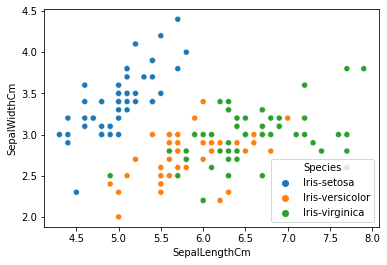

In [9]:
sns.scatterplot(data=data,x="SepalLengthCm",y="SepalWidthCm",hue="Species");

In [ ]:
#INFERENCES
# the class iris-setosa was able distinguish from the other two as shown in plot
# where as the versicolor and virginica points were mixed together.
#also setosa class flowers have less sepallength when compared to other two classes
#also highest sepal width are belongs to setosa

In [198]:
def euclidian_distance(test_data,train_data):
    distance=[]
    for i in test_data.index:
        point1=np.array((test_data["SepalLengthCm"][i],test_data["SepalWidthCm"][i]))
        #print("hi",point1)
        temp=[]
        for j in train_data.index:
            
            point2=np.array((train_data["SepalLengthCm"][j],train_data["SepalWidthCm"][j]))
            #print("hello",point2)
            temp.append([np.linalg.norm(point1-point2),train_data["Species"][j]])
            
        distance.append(temp)
        
    return distance
            
            

In [199]:
#print(euclidian_distance(test_data,training_data))

In [200]:
def minkdistances(distances,k,test_data):
    temp1=[]
    for i in range(len(test_data)):
#         x=pd.DataFrame(data=distances[i],columns=["distance","class"]).sort_values(by="distance")[0:k]
        lis1=sorted(distances[i],key=lambda x:x[0])
        #print("hi",lis1)
        x=lis1[0:k]
        temp1.append(x)
    
    return temp1
        
        
        

In [201]:
distances=euclidian_distance(test_data,training_data)
#print(minkdistances(distances,4,test_data))
k=int(input("enter the k:"))
mindistances=minkdistances(distances,k,test_data)

In [202]:
def category(mindistances,test_data,k):
    test_data1=[]
    for i in range(len(test_data)):
        lis1=mindistances[i]
        counter = Counter(sublist[1] for sublist in lis1)
        most_common_value, occurrence_count = counter.most_common(1)[0]
        test_data1.append(most_common_value)
    return test_data1;
        
        

In [203]:
test_data1=category(mindistances,test_data,k)
#print(test_data1)

In [204]:
def accuracy(test_data1,test_data):
    count=0
    test_data2=[]
    column_iterator=test_data["Species"].iteritems()
    for index,value in column_iterator:
        test_data2.append(value)
        
    for i in range(len(test_data)):
         if(test_data1[i]==test_data2[i]):
            count=count+1
    acc=count/len(test_data)
    acc=acc*100
    return acc

In [206]:
accuracy(test_data1,test_data)

55.55555555555556

In [ ]:
# USING ALL THE FOUR FEATURES  

In [229]:
data1=pd.read_csv("iris.csv")
def split(df):
    test_data=pd.DataFrame()
    d1=df[df['Species']=="Iris-setosa"][0:3]
    d2=df[df['Species']=="Iris-versicolor"][0:3]
    d3=df[df['Species']=="Iris-virginica"][0:3]
    test_data=pd.concat([d1,d2,d3])
    training_data=df.loc[list(set(df.index)-set(test_data.index))]
    return [test_data,training_data]


    
   
    


In [230]:
test_data,training_data=split(data1)
print(test_data)
print(training_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
50    51            7.0           3.2            4.7           1.4   
51    52            6.4           3.2            4.5           1.5   
52    53            6.9           3.1            4.9           1.5   
100  101            6.3           3.3            6.0           2.5   
101  102            5.8           2.7            5.1           1.9   
102  103            7.1           3.0            5.9           2.1   

             Species  
0        Iris-setosa  
1        Iris-setosa  
2        Iris-setosa  
50   Iris-versicolor  
51   Iris-versicolor  
52   Iris-versicolor  
100   Iris-virginica  
101   Iris-virginica  
102   Iris-virginica  
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \

In [231]:
def euclidian_distance(test_data,train_data):
    distance=[]
    for i in test_data.index:
        point1=np.array((test_data["SepalLengthCm"][i],test_data["SepalWidthCm"][i],test_data["PetalLengthCm"][i],test_data["PetalWidthCm"][i]))
        #print("hi",point1)
        temp=[]
        for j in train_data.index:
            
            point2=np.array((train_data["SepalLengthCm"][j],train_data["SepalWidthCm"][j],train_data["PetalLengthCm"][j],train_data["PetalWidthCm"][j]))
            #print("hello",point2)
            temp.append([np.linalg.norm(point1-point2),train_data["Species"][j]])
            
        distance.append(temp)
        
    return distance

In [232]:
#print(euclidian_distance(test_data,training_data))

In [233]:
def minkdistances(distances,k,test_data):
    temp1=[]
    for i in range(len(test_data)):
#         x=pd.DataFrame(data=distances[i],columns=["distance","class"]).sort_values(by="distance")[0:k]
        lis1=sorted(distances[i],key=lambda x:x[0])
        #print("hi",lis1)
        x=lis1[0:k]
        temp1.append(x)
    
    return temp1

In [234]:
distances=euclidian_distance(test_data,training_data)
#print(minkdistances(distances,4,test_data))
k=int(input("enter the k:"))

mindistances=minkdistances(distances,k,test_data)

In [235]:
def category(mindistances,test_data,k):
    test_data1=[]
    for i in range(len(test_data)):
        lis1=mindistances[i]
        counter = Counter(sublist[1] for sublist in lis1)
        most_common_value, occurrence_count = counter.most_common(1)[0]
        test_data1.append(most_common_value)
    return test_data1;

In [236]:
test_data1=category(mindistances,test_data,k)
#print(test_data1)

In [237]:
def accuracy(test_data1,test_data):
    count=0
    test_data2=[]
    column_iterator=test_data["Species"].iteritems()
    for index,value in column_iterator:
        test_data2.append(value)
        
    for i in range(len(test_data)):
         if(test_data1[i]==test_data2[i]):
            count=count+1
    acc=count/len(test_data)
    acc=acc*100
    return acc

In [238]:
accuracy(test_data1,test_data)

100.0

In [ ]:
# using the two fetures sepallength and sepal width i got the accuracy around 56 percent using the four feautres we got
# it as 100 percent. The implentation is
# 1) First we got the data or split the data that is required for us to analyse that is for the first question 
# only two features using pandas
# 2)then we split the data into test test and data set using indexing pandas and numpy
# 3)then we plot the graph using seaborn and got the inferences. seaborn, It divides 
# the classes into different colours based on the column name specified in the argument 
# "hue" and accepts the input x-axis and y-axis labels.
# 4)To build KNN, we compute the Euclidian distance for each data entry in the test data.
# For each computed distance, we created a new list and appended the distance and the index,
# which could then be used to determine the data entry's class. 
# Next, we select K minimal distances from the list of distances that have been ordered by distance.
# 5)The real class in the original train set is acquired from the obtained sorted distance
# list using the indices present in that list, and the class with the greatest number is then determined. 
# The prediction is deemed accurate if the anticipated class coincides with the test data point's actual class. 
# If not, it counts as an incorrect prediction.
# 6)I determine accuracy by dividing the total number of forecasts by the number of right guesses. 
# After then, the accuracy is transformed into a percentage. The accuracy for the first half of the question 
# is 55.56% for any value of k larger than or equal to 3, and for the second part of the question, 
# where we employ all the characteristics, the accuracy is 100% for any value of k.
